In [2]:
import pickle
with open("center_line_raw", "rb") as fp:   # Unpickling
    line = pickle.load(fp)

[(6.21159362792969, 0.0736393555998802, 5.97974586486816), (6.21159362792969, 0.0736393555998802, 5.97974586486816), (6.21159362792969, 0.0736393481492996, 5.97974586486816), (6.21159362792969, 0.0736393555998802, 5.97974586486816), (6.21159362792969, 0.0736393481492996, 5.97974586486816), (6.21159362792969, 0.0736393555998802, 5.97974586486816), (6.21159362792969, 0.0736393630504608, 5.97974586486816), (6.21159362792969, 0.0736393555998802, 5.97974586486816), (6.21159362792969, 0.0736393555998802, 5.97974586486816), (6.21159362792969, 0.0736393630504608, 5.97974586486816)]
1666


(-1.0, 12.0)

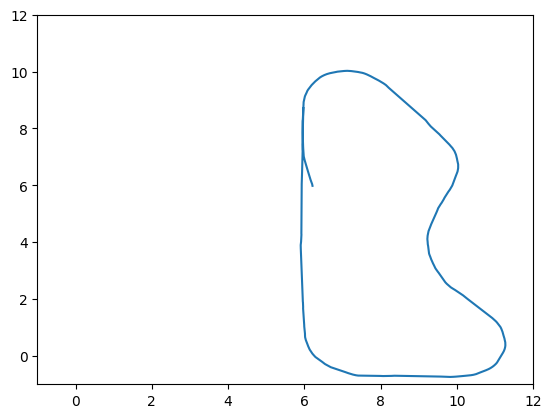

In [3]:
print(line[0:10])
x = [a[0] for a in line]
y = [a[2] for a in line]
print(len(line))
import matplotlib.pyplot as plt

plt.plot(x, y)
plt.xlim(-1,12)
plt.ylim(-1, 12)

We remove the first positions, where the car was not on top of the center line.

(-1.0, 12.0)

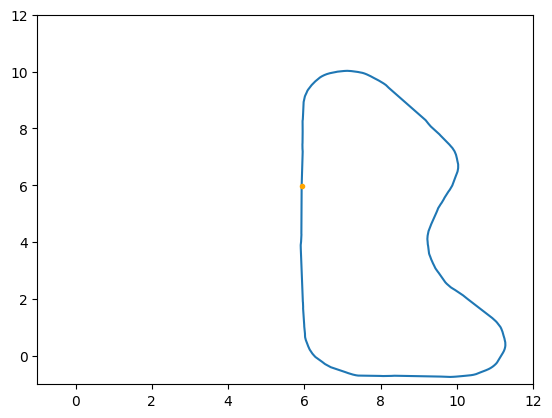

In [4]:
a = x[160:-54]
b = y[160:-54]
#plt.plot(x[160:-54], y[160:-54]) # plt.plot(x[160:-54], y[160:-54])

a1 = a[-144+54:] + a[:-144+54]
b1 = b[-144+54:] + b[:-144+54]

plt.plot(a1,b1)
plt.plot(a1[0],b1[0],'o',markersize=3,color="orange")

plt.xlim(-1,12)
plt.ylim(-1, 12)

We find the track progress of every point.

In [5]:
import numpy as np

def distance(x,y):
    n = len(x) # == len(y)
    dist = [0] # distance
    cum_dist = [0] # cumulative distance
    for i in range(1,n):
        dist.append( np.sqrt ( (x[i]-x[i-1])**2 + (y[i]-y[i-1])**2 ) )
        cum_dist.append( cum_dist[i-1]+dist[i] )
    return dist, cum_dist

dist, cum_dist = distance(a1,b1)
print(dist)
print(cum_dist)
track_progress = [100*x/cum_dist[-1] for x in cum_dist]
print(track_progress)

[0, 0.008149028925655622, 0.008703684092313875, 0.01165069651741214, 0.01473459356066094, 0.018384472737275313, 0.019718760005639227, 0.019588817967810875, 0.019415036442125545, 0.019210417804826355, 0.01893581826113628, 0.020572563148509884, 0.024162295421187484, 0.026066475900528917, 0.025615971089558764, 0.025248276697554653, 0.025358121728545607, 0.02505112054668278, 0.024802697045198444, 0.025144321212945322, 0.02422765701101119, 0.02406476677547537, 0.023815697097921633, 0.02357580118215936, 0.023337335440582373, 0.02310028933468154, 0.022867067530567883, 0.02263478863139941, 0.022405857316916727, 0.022178356167606373, 0.021954668784189637, 0.021731945404879757, 0.02151207178834404, 0.021294105052137573, 0.021079009212259, 0.022432553676807777, 0.025397759455409445, 0.026226297589714915, 0.025916758338533675, 0.025657772543504286, 0.02539690105193516, 0.025139811539939282, 0.024885603534938728, 0.024632348974920584, 0.024383861611459452, 0.024136317077137336, 0.02389260752072696,

(-1.0, 12.0)

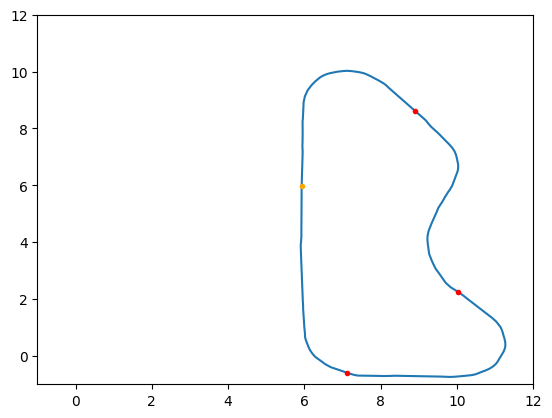

In [6]:
plt.plot(a1,b1)
plt.plot(a1[0],b1[0],'o',markersize=3,color="orange")

idx_50_track = min(range(len(track_progress)), key=lambda i: abs(track_progress[i]-50.0)) # index of the point with progress closest to 50%
idx_75_track = min(range(len(track_progress)), key=lambda i: abs(track_progress[i]-75.0)) # index of the point with progress closest to 75%
idx_25_track = min(range(len(track_progress)), key=lambda i: abs(track_progress[i]-25.0)) # index of the point with progress closest to 25%
plt.plot(a1[idx_50_track],b1[idx_50_track],'o',markersize=3,color="red")
plt.plot(a1[idx_75_track],b1[idx_75_track],'o',markersize=3,color="red")
plt.plot(a1[idx_25_track],b1[idx_25_track],'o',markersize=3,color="red")

plt.xlim(-1,12)
plt.ylim(-1, 12)

We find the track progress associated to any given point.

(-1.0, 12.0)

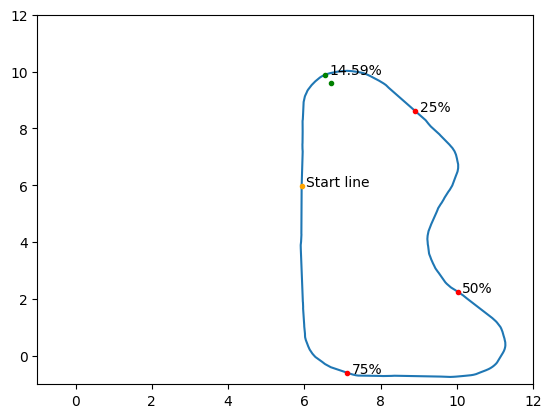

In [7]:
def progress(point,center_line,track_progress):
    idx = min(range(len(center_line)), key=lambda i: abs( np.sqrt((center_line[i][0]-point[0])**2 + (center_line[i][1]-point[1])**2) )) # index of the center line point closest to "point"
    return track_progress[idx], center_line[idx]


point = (6.7,9.6)
tp, cl = progress(point, [(a,b) for a,b in zip(a1,b1)], track_progress)

plt.plot(a1,b1)
plt.plot(a1[0],b1[0],'o',markersize=3,color="orange")
plt.text(a1[0]+0.12,b1[0], 'Start line', fontsize = 10)

idx_50_track = min(range(len(track_progress)), key=lambda i: abs(track_progress[i]-50.0)) # index of the point with progress closest to 50%
idx_75_track = min(range(len(track_progress)), key=lambda i: abs(track_progress[i]-75.0)) # index of the point with progress closest to 75%
idx_25_track = min(range(len(track_progress)), key=lambda i: abs(track_progress[i]-25.0)) # index of the point with progress closest to 25%
plt.plot(a1[idx_50_track],b1[idx_50_track],'o',markersize=3,color="red")
plt.text(a1[idx_50_track]+0.12,b1[idx_50_track], '50%', fontsize = 10)
plt.plot(a1[idx_75_track],b1[idx_75_track],'o',markersize=3,color="red")
plt.text(a1[idx_75_track]+0.12,b1[idx_75_track], '75%', fontsize = 10)
plt.plot(a1[idx_25_track],b1[idx_25_track],'o',markersize=3,color="red")
plt.text(a1[idx_25_track]+0.12,b1[idx_25_track], '25%', fontsize = 10)

plt.plot(cl[0],cl[1],'o',markersize=3,color="green")
plt.text(cl[0]+0.12,cl[1], str(round(tp,2))+"%" , fontsize = 10)
plt.plot(point[0],point[1],'o',markersize=3,color="green")

plt.xlim(-1,12)
plt.ylim(-1, 12)

We add more points to the center track line vector.

In [8]:
print(len(a1))

def add_num_points(x,y,iterations):
    for _ in range(iterations):
        n = len(x)
        res_x = []
        res_y = []
        for i in range(n):
            res_x.append((x[i-1]+x[i])/2)
            res_y.append((y[i-1]+y[i])/2)
            res_x.append(x[i])
            res_y.append(y[i])
        x = res_x
        y = res_y
            
    return x, y

res_x, res_y = add_num_points(a1,b1,iterations=2)
print(len(a1), len(res_x))

1452
1452 5808


(-1.0, 12.0)

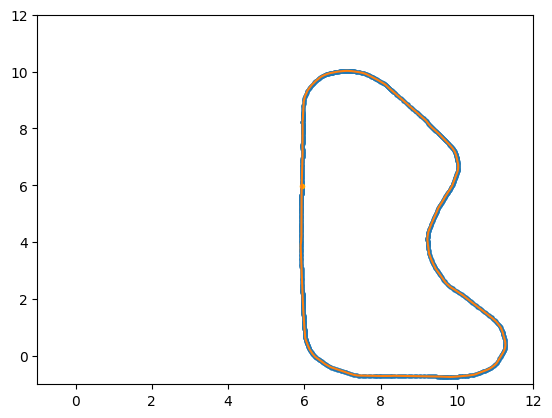

In [9]:
plt.plot(a1,b1,".",markersize=4)
plt.plot(a1[0],b1[0],'o',markersize=3,color="orange")
plt.plot(res_x,res_y,markersize=2)
plt.xlim(-1,12)
plt.ylim(-1, 12)

In [10]:
#we save the points
# sv = [(x,y) for x,y in zip(res_x,res_y)]
# with open("center_line_1452", "wb") as fp:   #Pickling
#     pickle.dump(sv, fp)

# Creating time sectors

(-1.0, 12.0)

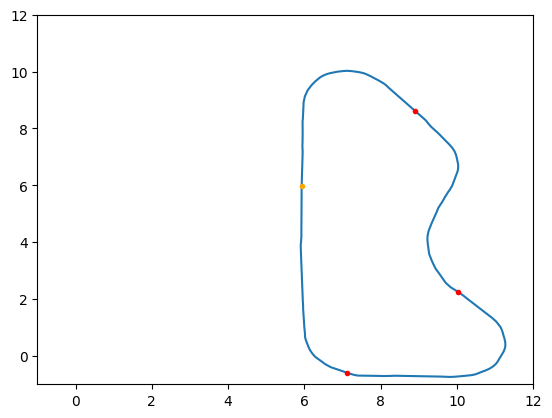

In [11]:
plt.plot(a1,b1)
plt.plot(a1[0],b1[0],'o',markersize=3,color="orange")

idx_50_track = min(range(len(track_progress)), key=lambda i: abs(track_progress[i]-50.0)) # index of the point with progress closest to 50%
idx_75_track = min(range(len(track_progress)), key=lambda i: abs(track_progress[i]-75.0)) # index of the point with progress closest to 75%
idx_25_track = min(range(len(track_progress)), key=lambda i: abs(track_progress[i]-25.0)) # index of the point with progress closest to 25%
plt.plot(a1[idx_50_track],b1[idx_50_track],'o',markersize=3,color="red")
plt.plot(a1[idx_75_track],b1[idx_75_track],'o',markersize=3,color="red")
plt.plot(a1[idx_25_track],b1[idx_25_track],'o',markersize=3,color="red")

plt.xlim(-1,12)
plt.ylim(-1, 12)

In [12]:
(len(a1)+1) % len(a1)

1

Is up: True
Is ahead: (False, 38.65706401023087, -349.70430412269707, True)


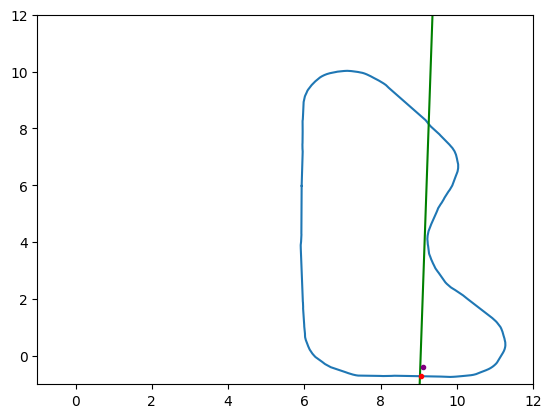

In [13]:
def create_line(x,y,m,c): # creating a line that has x and y in the middle point
    res_x = [x+ i/100 for i in range(-100, 100)]
    res_y = []
    for x_i in res_x:
        res_y.append(m*x_i+c)
    return res_x, res_y

def create_perp_line(track,index):
    a1 = track[0]
    b1 = track[1]
    x0 = a1[index-1]; x1 = a1[index]; x2 = a1[(index+1) % len(a1)]
    y0 = b1[index-1]; y1 = b1[index]; y2 = b1[(index+1) % len(b1)]
    m = (y2-y0)/(x2-x0)
    # c = y2-m*x2
    # line_x, line_y = create_line(x1,y1,m,c)
    #plt.plot(line_x,line_y)

    m_perp = -1/m
    c_perp = y2-m_perp*x2
    line_x_perp, line_y_perp = create_line(x1,y1,m_perp,c_perp)
    
    plt.plot(line_x_perp,line_y_perp,color="green")
    return m_perp, c_perp

def is_ahead(line_point_idx, point, track):
    """
    Given a line point index, any point and the track, returns if the 
    point is ahead in the track in comparison to the line point.
    Note: it only works if the point is very close to the line_point_idx
    """
    x_track = track[0]; y_track = track[1]
    m,c = create_perp_line(track,line_point_idx) # creates a perpendicular line from the line point
    
    # we get the direction in which the track is pointing (if the next line point is above the perpendicular line or below)
    is_up = False
    if y_track[(line_point_idx+4) % len(x_track)] > (m*x_track[(line_point_idx+4) % len(x_track)]+c):
        is_up = True
    print("Is up:", is_up)
    # point_idx[1] is its y, and point_idx[0] its x
    if is_up and point[1] > (m*point[0]+c):
        return True,m,c,is_up
    if not is_up and point[1] < (m*point[0]+c):
        return True,m,c,is_up
    return False,m,c,is_up

plt.plot(a1,b1)
index=972
#create_perp_line(track=(a1,b1),index=index)
point = (9.1,-0.4)
print("Is ahead:", is_ahead(index, point, track=(a1,b1)))
plt.xlim(-1,12)
plt.ylim(-1,12)
plt.plot(a1[index],b1[index],'o',markersize=3,color="red")
plt.plot(point[0],point[1],'o',markersize=3,color="purple")

Is up: True
Is ahead:  (False, 0.012417134115007503, 7.873842595927115, True)


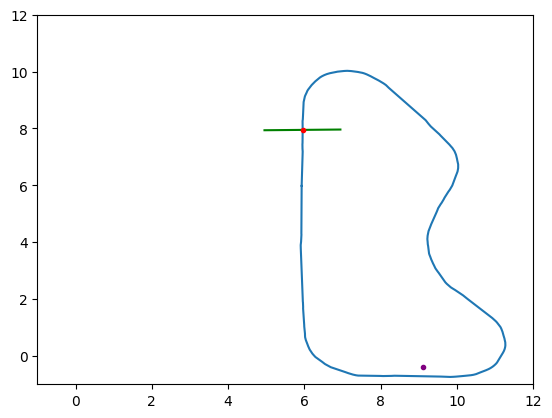

In [14]:
plt.plot(a1,b1)
index=100
#create_perp_line(track=(a1,b1),index=index)
point = (9.1,-0.4)
print("Is ahead: ", is_ahead(index, point, track=(a1,b1)))
plt.xlim(-1,12)
plt.ylim(-1,12)
plt.plot(a1[index],b1[index],'o',markersize=3,color="red")
plt.plot(point[0],point[1],'o',markersize=3,color="purple")

Is up: True
Is ahead:  (False, -0.023434183341814373, 6.139373948101566, True)


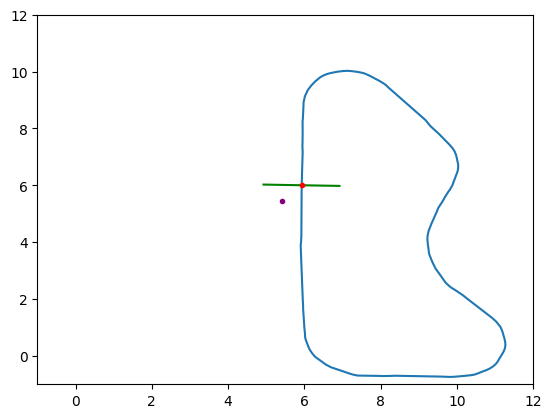

Is up: True
Is ahead:  (True, 0.012415001030625187, 7.88306634779149, True)


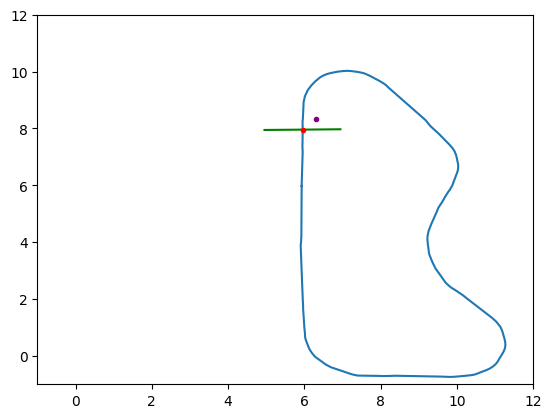

Is up: True
Is ahead:  (False, -0.9851752503580486, 15.927405694338493, True)


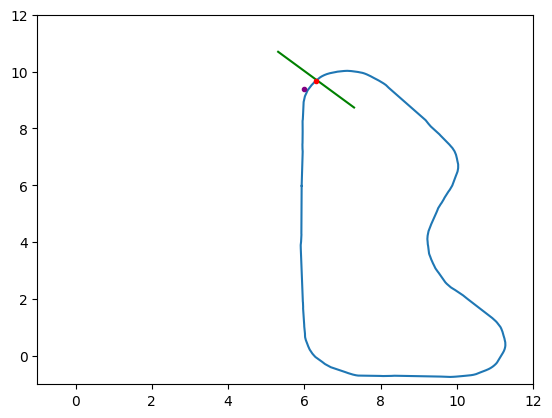

Is up: False
Is ahead:  (False, 1.8557380910330776, -4.418761535933793, False)


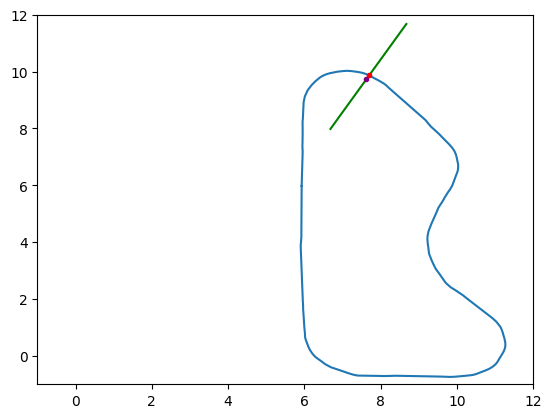

Is up: False
Is ahead:  (True, 0.7976690640650538, 0.9679965792717118, False)


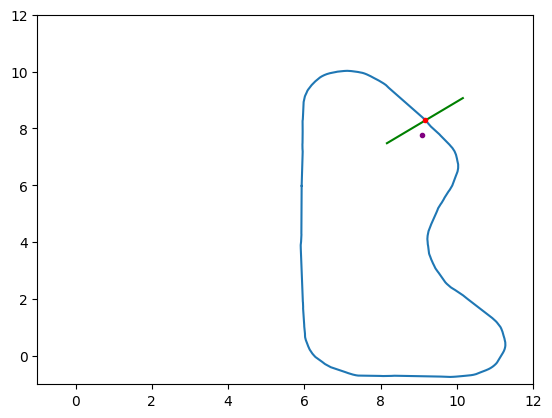

Is up: False
Is ahead:  (True, 0.17675373398326355, 5.069248125488058, False)


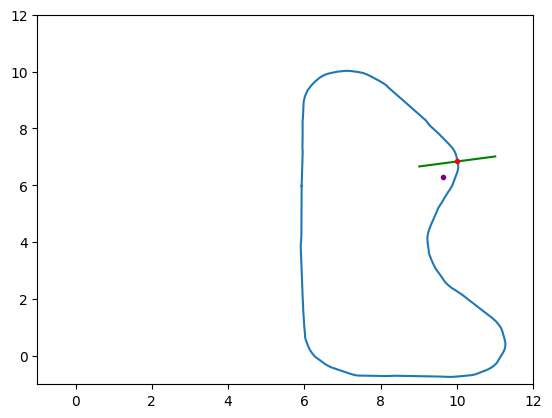

Is up: False
Is ahead:  (False, -0.2930097180796175, 7.866586730741446, False)


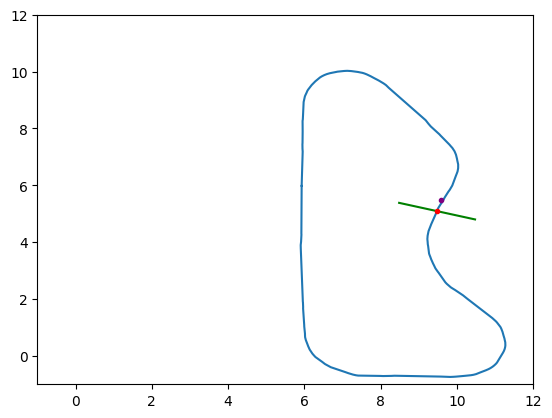

Is up: False
Is ahead:  (True, 0.3466875966877532, -0.17055584510380184, False)


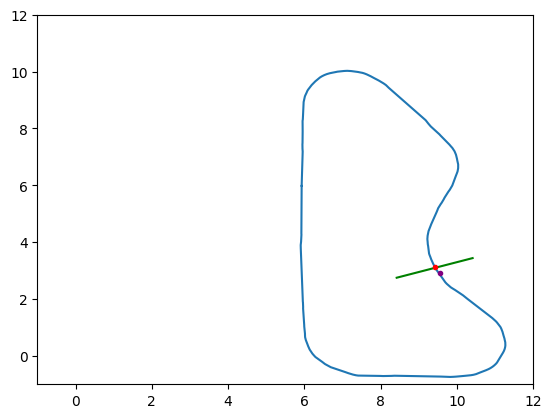

Is up: False
Is ahead:  (False, 0.6398409829691974, -6.057825852662873, False)


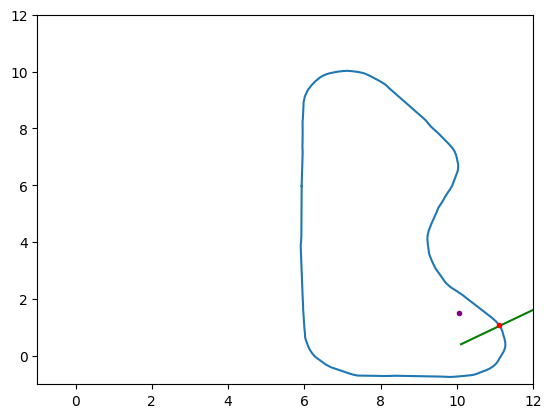

Is up: False
Is ahead:  (False, -2.3038607297305567, 23.48457099308467, False)


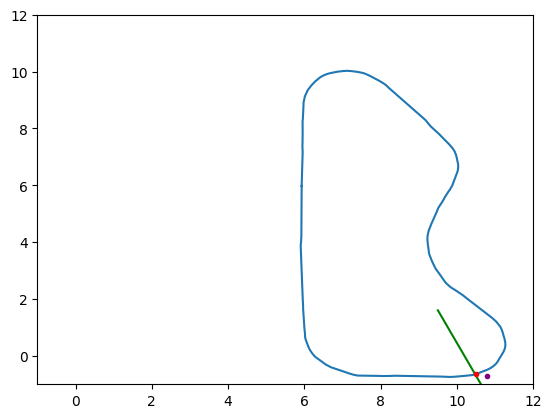

Is up: False
Is ahead:  (False, -31.39045333534511, 256.0994945045008, False)


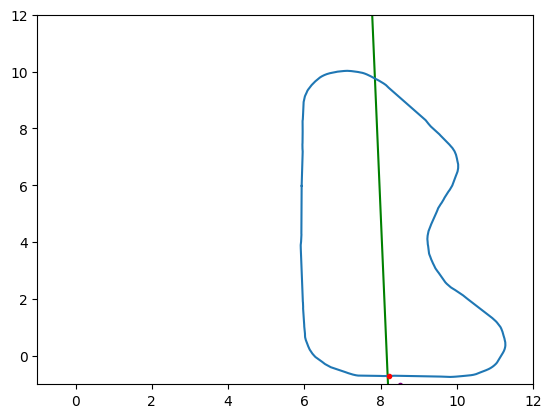

Is up: True
Is ahead:  (False, 0.5751428689079937, -3.492837502673021, True)


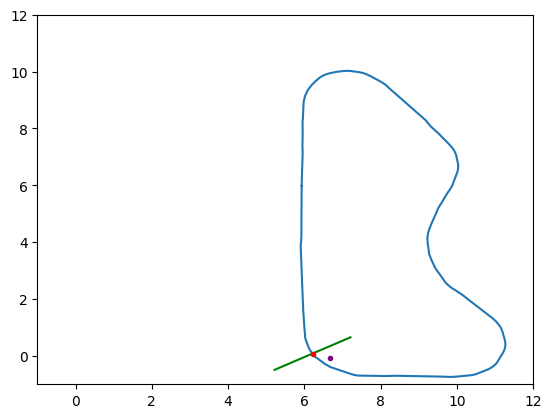

Is up: True
Is ahead:  (False, 0.0518022133550668, 1.1769425824757513, True)


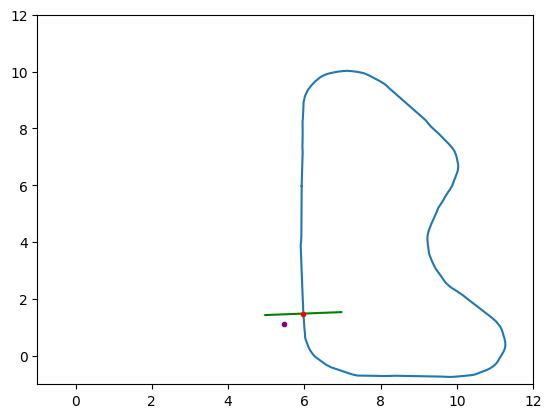

Is up: True
Is ahead:  (False, 0.028538366120249008, 3.310018889924095, True)


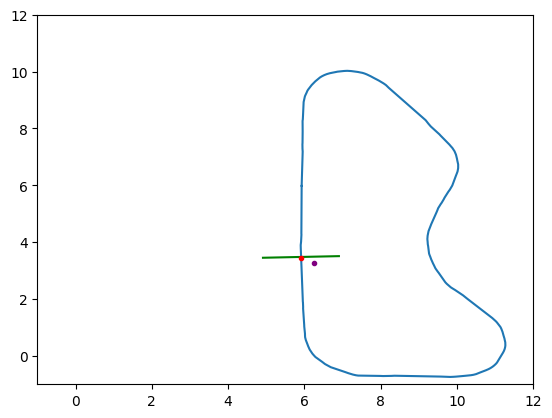

Is up: True
Is ahead:  (True, -0.002695235028073853, 5.455431781137056, True)


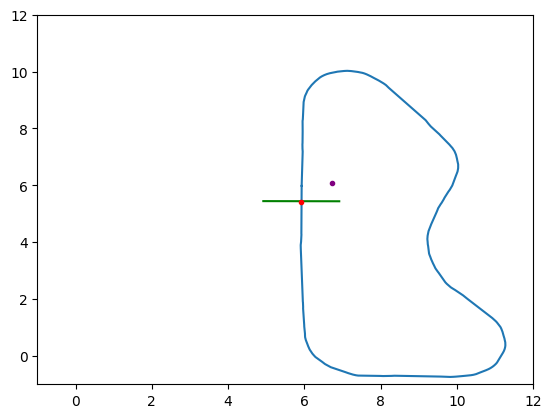

In [15]:
import time
import numpy as np

for index in range(1,len(a1),100):
    point = (a1[index]+np.random.normal(0, 0.5, 1)[0],b1[index]+np.random.normal(0, 0.5, 1)[0])
    print("Is ahead: ", is_ahead(index, point, track=(a1,b1)))
    plt.plot(a1,b1)
    plt.xlim(-1,12)
    plt.ylim(-1,12)
    plt.plot(a1[index],b1[index],'o',markersize=3,color="red")
    plt.plot(point[0],point[1],'o',markersize=3,color="purple")
    plt.show()
    time.sleep(1)

# Sector creation
We create the sectors, taking into account that each lap has around 200 steps.

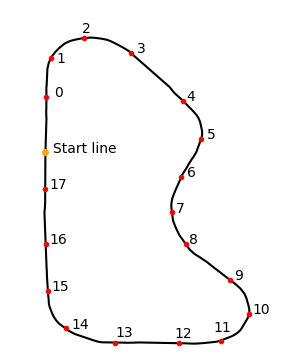

In [34]:
plt.figure(figsize=(3.45, 4.43))
plt.plot(a1,b1,color="black")
plt.xlim(5,12)
plt.ylim(-1,11)
plt.plot(a1[0],b1[0],'o',markersize=4,color="orange")
plt.text(a1[0]+0.20,b1[0], 'Start line', fontsize = 10)
sectors_idx = [100,180,250,340,430,520,600,670,720,780,840,900,960,1020,1080,1180,1280,1360]
margins = [(0.20,0),(0.15,-0.15),(-0.05,0.2),(0.15,0),(0.1,0),(0.15,0),(0.15,0),(0.1,0),(0.1,0),(0.1,0),(0.1,0),(-0.2,0.3),(-0.1,0.2),(0,0.2),(0.15,0),(0.1,0),(0.1,0),(0.1,0)]
for i, idx in enumerate(sectors_idx):
    plt.plot(a1[idx],b1[idx],'o',markersize=3,color="red")
    plt.text(a1[idx]+margins[i][0],b1[idx]+margins[i][1], i, fontsize = 10)

# plt.title("Track sectors")
plt.axis('off')
# plt.savefig("../../../../track_sectors.png", bbox_inches='tight')

For every sector we save the `is_up` variable, and the `m` and `c` parameters from their perpendicular straight line.

Is up: True
Is ahead:  False


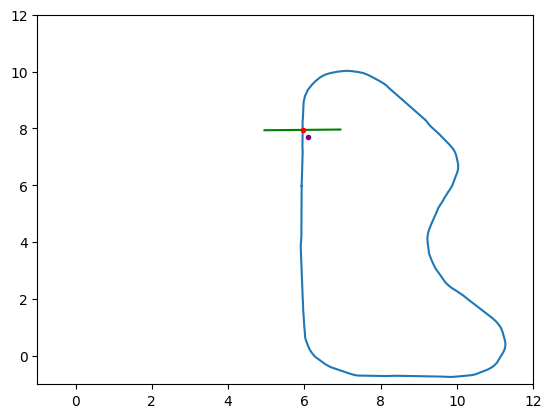

Is up: True
Is ahead:  True


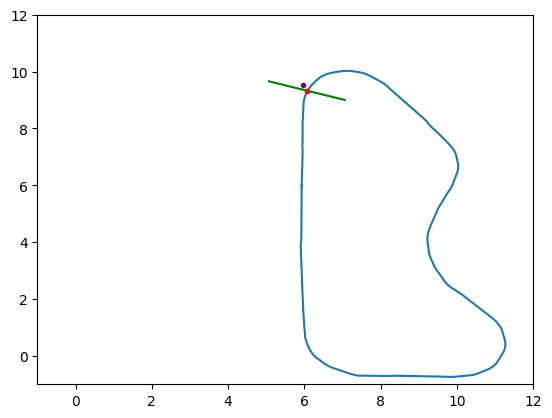

Is up: True
Is ahead:  True


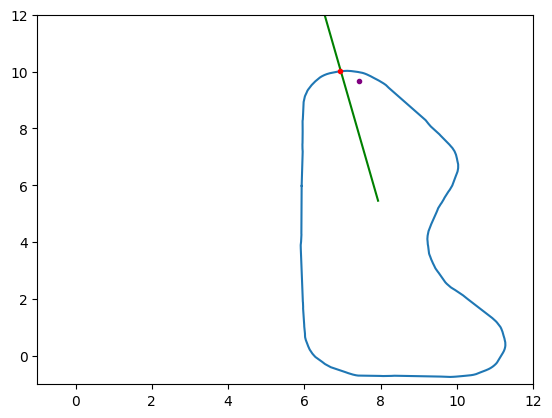

Is up: False
Is ahead:  False


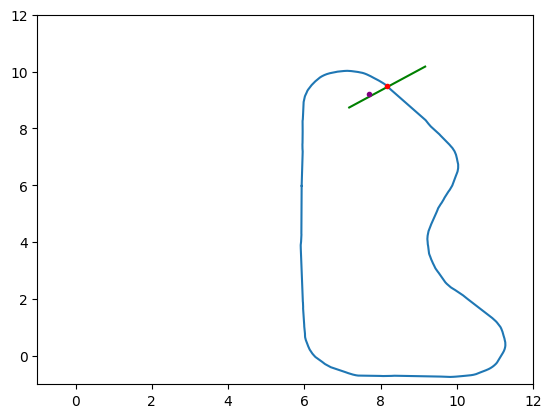

Is up: False
Is ahead:  False


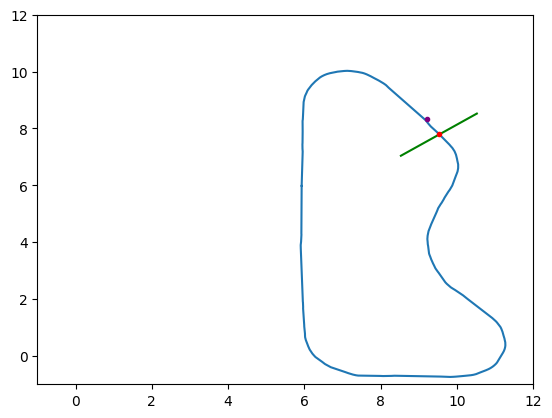

Is up: False
Is ahead:  True


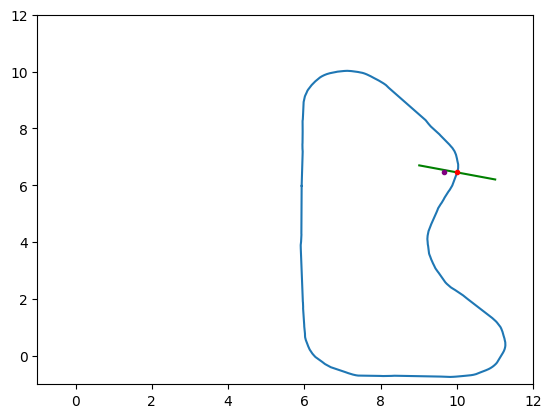

Is up: False
Is ahead:  True


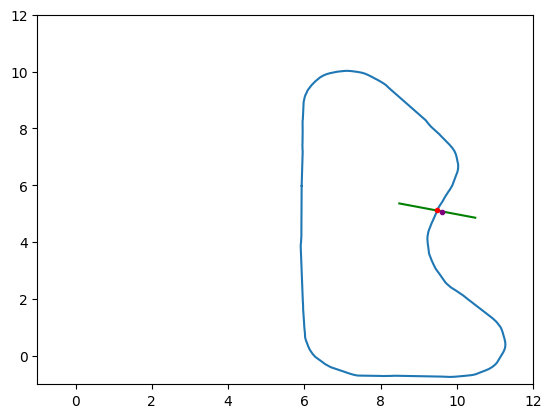

Is up: False
Is ahead:  True


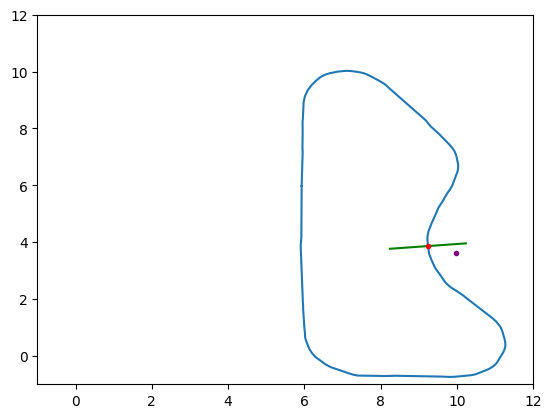

Is up: False
Is ahead:  False


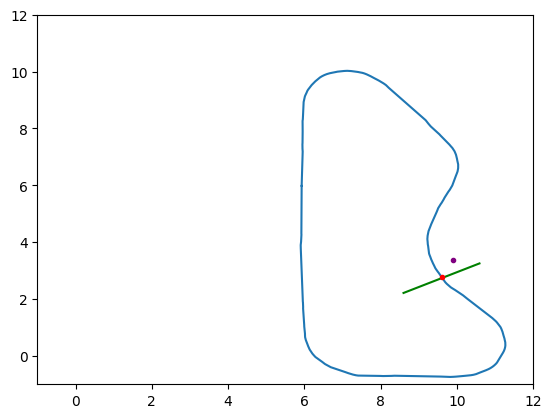

Is up: False
Is ahead:  False


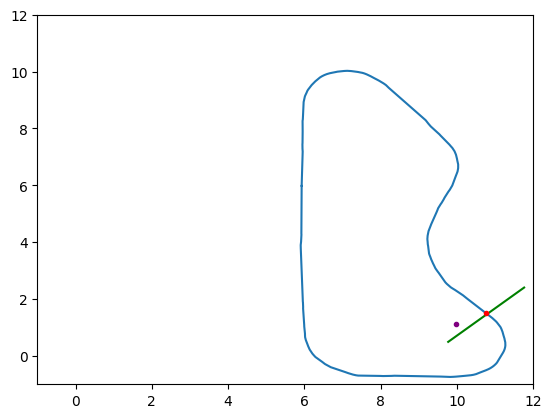

Is up: False
Is ahead:  True


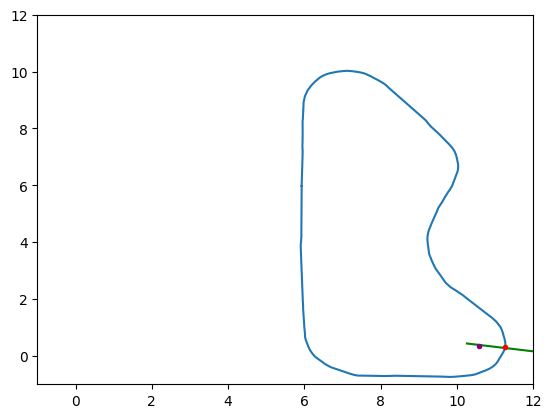

Is up: False
Is ahead:  True


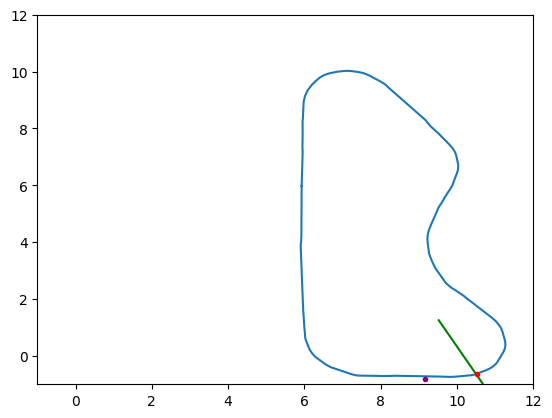

Is up: True
Is ahead:  False


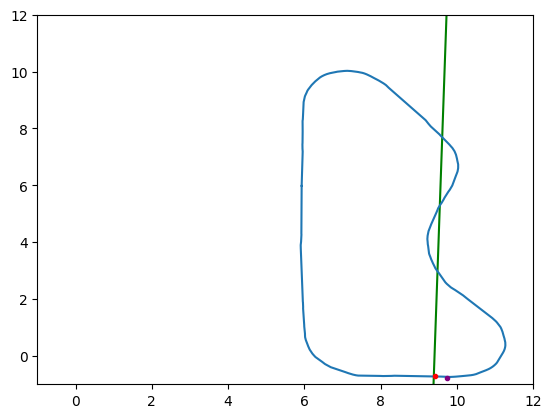

Is up: True
Is ahead:  True


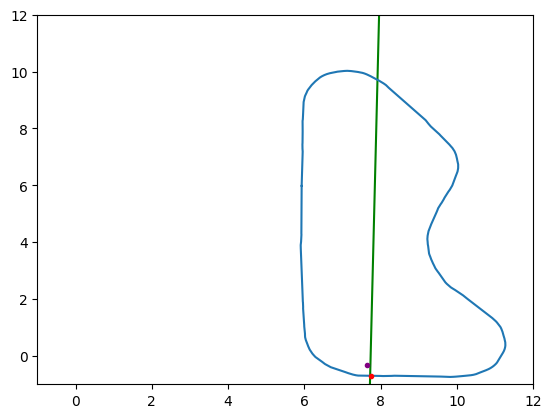

Is up: True
Is ahead:  True


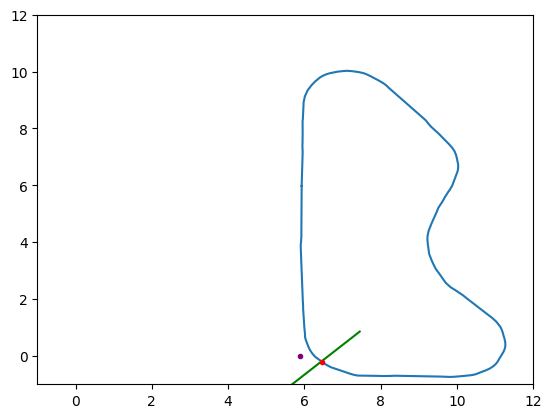

Is up: True
Is ahead:  True


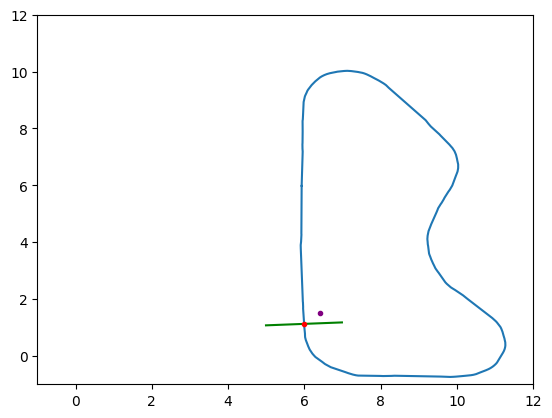

Is up: True
Is ahead:  True


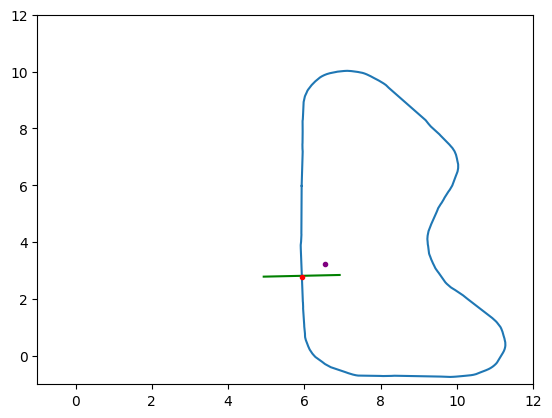

Is up: True
Is ahead:  True


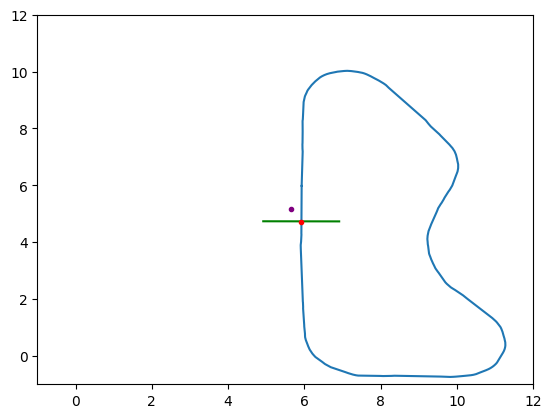

In [183]:
import time
import numpy as np

sectors_idx = [100,180,250,340,430,520,600,670,720,780,840,900,960,1020,1080,1180,1280,1360]
sectors = {}
sectors["idx"] = [100,180,250,340,430,520,600,670,720,780,840,900,960,1020,1080,1180,1280,1360]
sectors["is_up"] = []
sectors["m"] = []
sectors["c"] = []

for index in sectors_idx:
    point = (a1[index]+np.random.normal(0, 0.5, 1)[0],b1[index]+np.random.normal(0, 0.5, 1)[0])
    is_ah,m,c,is_up = is_ahead(index, point, track=(a1,b1))
    sectors["is_up"].append(is_up)
    sectors["m"].append(m)
    sectors["c"].append(c)
    print("Is ahead: ", is_ah)
    plt.plot(a1,b1)
    plt.xlim(-1,12)
    plt.ylim(-1,12)
    plt.plot(a1[index],b1[index],'o',markersize=3,color="red")
    plt.plot(point[0],point[1],'o',markersize=3,color="purple")
    plt.show()

Is ahead:  True


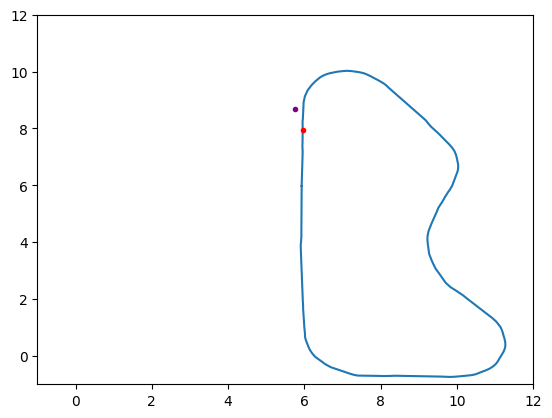

Is ahead:  False


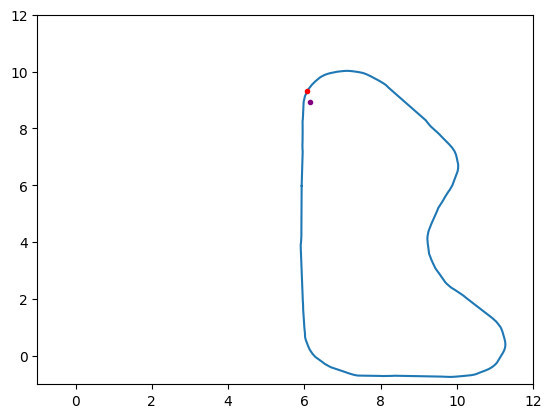

Is ahead:  True


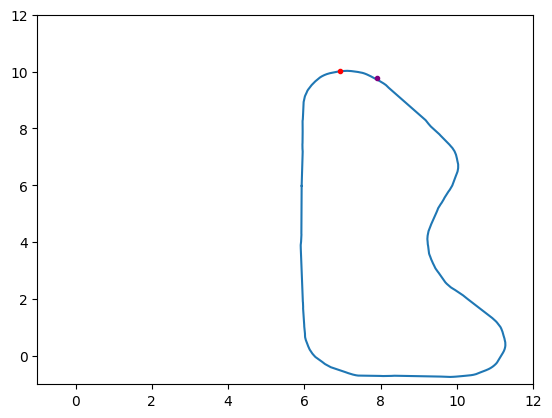

Is ahead:  False


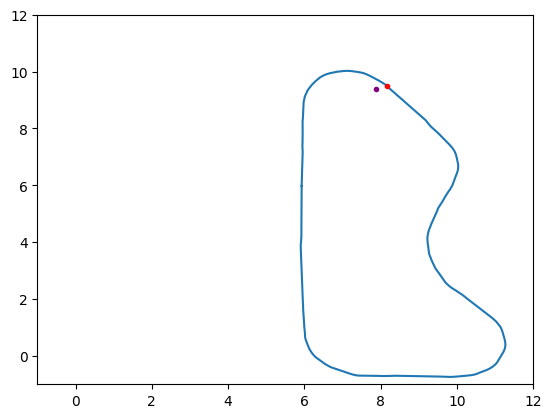

Is ahead:  True


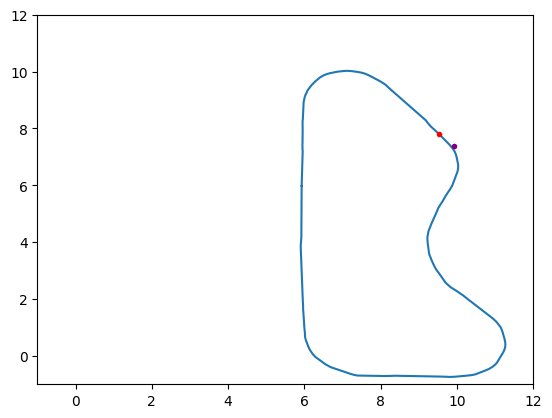

Is ahead:  False


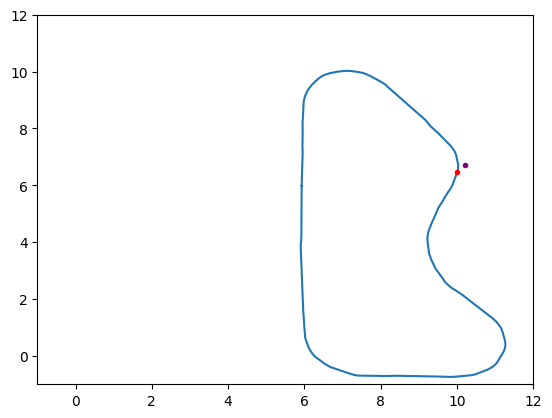

Is ahead:  False


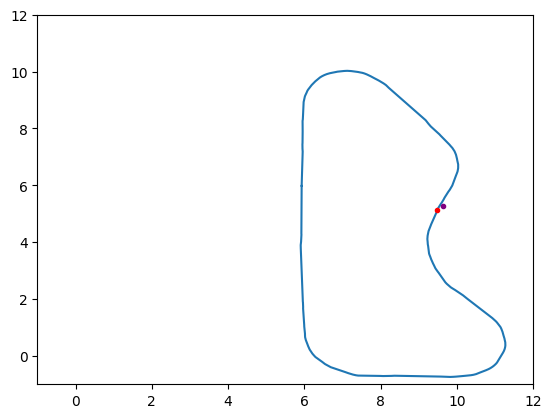

Is ahead:  False


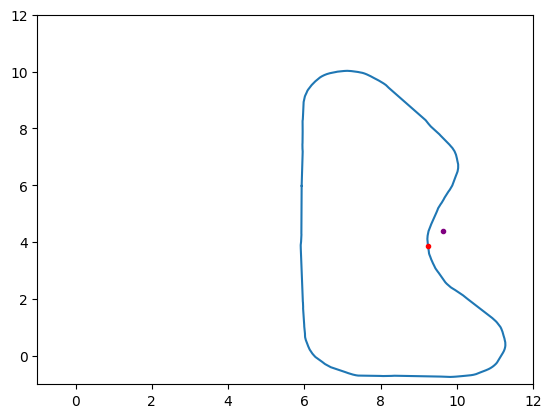

Is ahead:  False


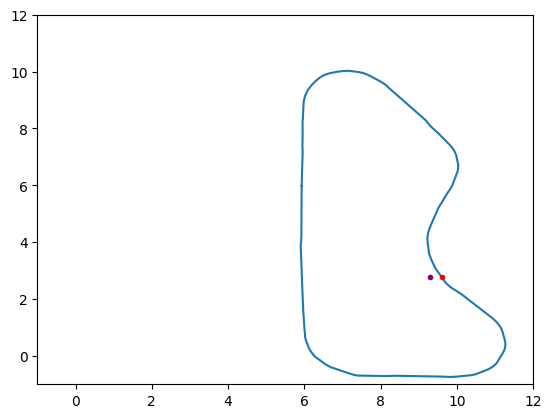

Is ahead:  True


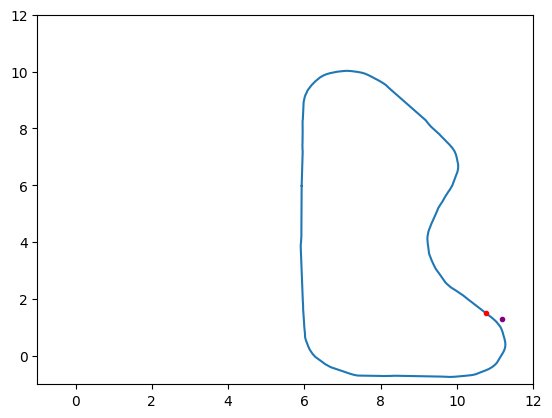

Is ahead:  True


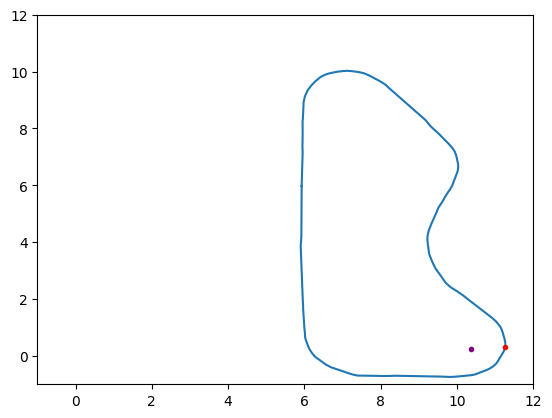

Is ahead:  False


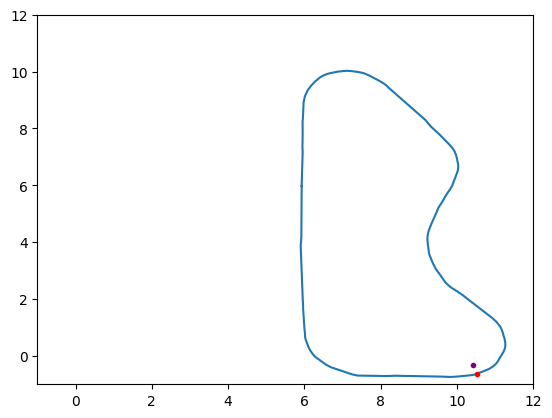

Is ahead:  True


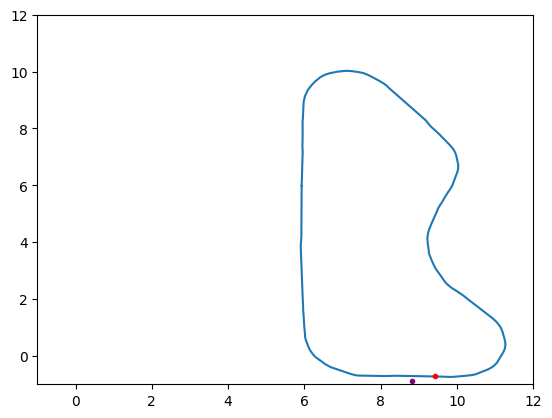

Is ahead:  True


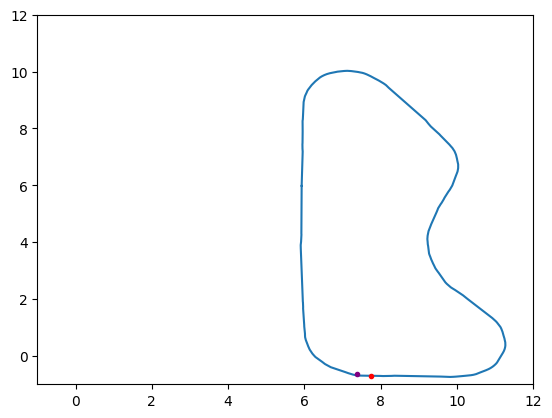

Is ahead:  False


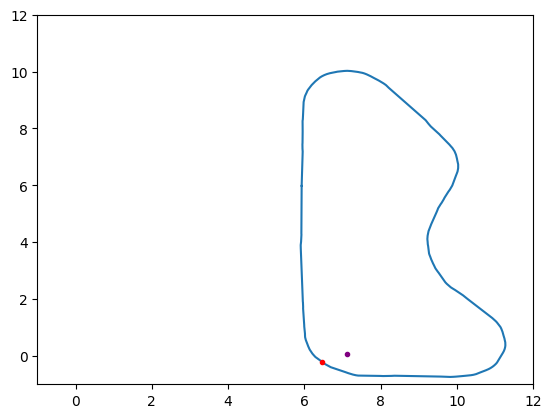

Is ahead:  False


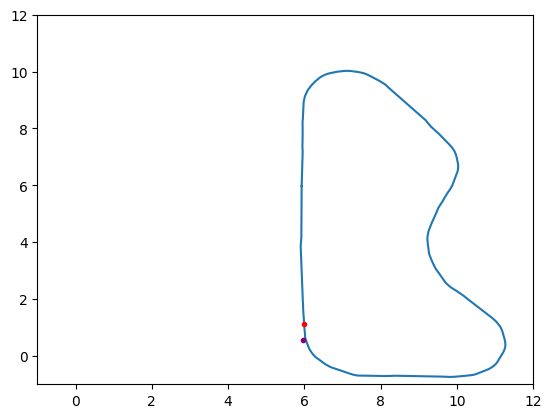

Is ahead:  False


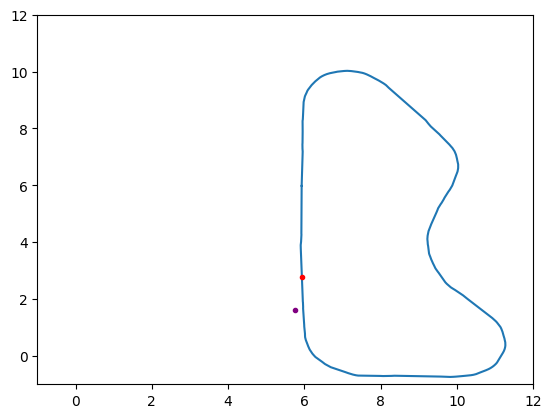

Is ahead:  True


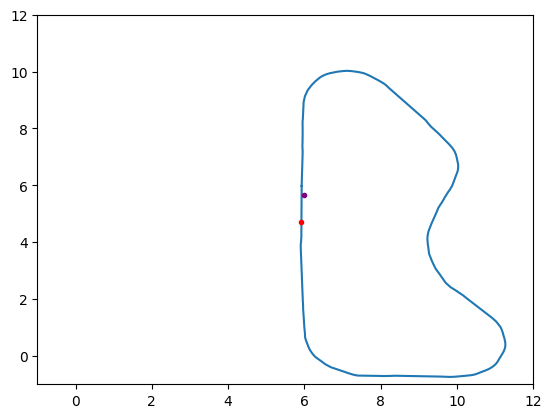

In [186]:
def is_ahead_simplified(sector_idx, point, sectors):
    """
    Given a sector index, any point and the sectors information, it returns if the 
    point is ahead in the track in comparison to the sector point.
    Note: it only works if the point is close to the sector
    """
    m = sectors["m"][sector_idx]
    c = sectors["c"][sector_idx]
    is_up = sectors["is_up"][sector_idx]
    
    # point_idx[1] is its y, and point_idx[0] its x
    if is_up and point[1] > (m*point[0]+c):
        return True
    if not is_up and point[1] < (m*point[0]+c):
        return True
    return False


for sector_index in range(len(sectors_idx)):
    index = sectors_idx[sector_index]
    point = (a1[index]+np.random.normal(0, 0.5, 1)[0],b1[index]+np.random.normal(0, 0.5, 1)[0])
    print("Is ahead: ", is_ahead_simplified(sector_index, point, sectors))
    plt.plot(a1,b1)
    plt.xlim(-1,12)
    plt.ylim(-1,12)
    plt.plot(a1[index],b1[index],'o',markersize=3,color="red")
    plt.plot(point[0],point[1],'o',markersize=3,color="purple")
    plt.show()